In [1]:
#importing required packages
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
import pickle

In [2]:
 #Read the data
data = pd.read_csv("train-data.csv")

#dataset properties
print(f'Shape of the dataset: {data.shape}')
print(f'Columns of the dataset: {data.columns}')
data.head()

Shape of the dataset: (6019, 12)
Columns of the dataset: Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [3]:
# Change the Year column to the years of usage
data['Year'] = dt.date.today().year - data['Year']

# Select the first word of the Power column
data['Power'] =data['Power'].apply(lambda x: str(x).split(' ')[0])
data['Power'] = [np.nan if x=='null' else x for x in data['Power']]
data['Power'] = [np.nan if x=='nan' else x for x in data['Power']]

# Select the first word of the Engine column
data['Engine'] =data['Engine'].apply(lambda x: str(x).split(' ')[0])
data['Engine'] = [np.nan if x=='null' else x for x in data['Engine']]
data['Engine'] = [np.nan if x=='nan' else x for x in data['Engine']]
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,12,72000,CNG,Manual,First,26.6 km/kg,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,7,41000,Diesel,Manual,First,19.67 kmpl,1582,126.2,5.0,12.50
2,Honda Jazz V,Chennai,11,46000,Petrol,Manual,First,18.2 kmpl,1199,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,10,87000,Diesel,Manual,First,20.77 kmpl,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,9,40670,Diesel,Automatic,Second,15.2 kmpl,1968,140.8,5.0,17.74


In [4]:
# Check for null values
data.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

In [5]:
# Replace missing values with median value of the column
power_median = data['Power'].median() 
data['Power'] = data['Power'].fillna(power_median)

seat_median = data['Seats'].median()
data['Seats'] = data['Seats'].fillna(seat_median)

# Drop the remaining rows with missing value
data.dropna(axis=0, inplace=True)

# Check for missing values
data.isnull().sum().any()

False

In [6]:
#Separating car make from car model
data['Car_Make'] = data['Name'].apply(lambda x: x.split(' ')[0].upper())
data['Car_Model'] = data['Name'].apply(lambda x: x.split(' ')[1].upper())

data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Make,Car_Model
0,Maruti Wagon R LXI CNG,Mumbai,12,72000,CNG,Manual,First,26.6 km/kg,998,58.16,5.0,1.75,MARUTI,WAGON
1,Hyundai Creta 1.6 CRDi SX Option,Pune,7,41000,Diesel,Manual,First,19.67 kmpl,1582,126.2,5.0,12.50,HYUNDAI,CRETA
2,Honda Jazz V,Chennai,11,46000,Petrol,Manual,First,18.2 kmpl,1199,88.7,5.0,4.50,HONDA,JAZZ
3,Maruti Ertiga VDI,Chennai,10,87000,Diesel,Manual,First,20.77 kmpl,1248,88.76,7.0,6.00,MARUTI,ERTIGA
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,9,40670,Diesel,Automatic,Second,15.2 kmpl,1968,140.8,5.0,17.74,AUDI,A4


In [7]:
# Getting car make and model
make_model = data[['Car_Make','Car_Model']]

#Saving car make and model to a json file
json_file = r"cars.json"
make_model.to_json(json_file, indent = 1, orient = 'records')

In [8]:
#Selecting Required attributes.
data = data[['Car_Make','Car_Model','Year','Kilometers_Driven','Fuel_Type','Transmission','Engine','Power','Seats','Price']]

data.tail()

,Car_Make,Car_Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Engine,Power,Seats,Price
6014,MARUTI,SWIFT,8,27365,Diesel,Manual,1248,74,5.0,4.75
6015,HYUNDAI,XCENT,7,100000,Diesel,Manual,1120,71,5.0,4.00
6016,MAHINDRA,XYLO,10,55000,Diesel,Manual,2498,112,8.0,2.90
6017,MARUTI,WAGON,9,46000,Petrol,Manual,998,67.1,5.0,2.65
6018,CHEVROLET,BEAT,11,47000,Diesel,Manual,936,57.6,5.0,2.50


In [9]:
# Hot encoder ,
data = pd.get_dummies(data, columns=['Car_Make','Car_Model','Fuel_Type','Transmission'])

data.tail()

,Year,Kilometers_Driven,Engine,Power,Seats,Price,Car_Make_AMBASSADOR,Car_Make_AUDI,Car_Make_BENTLEY,Car_Make_BMW,...,Car_Model_YETI,Car_Model_Z4,Car_Model_ZEN,Car_Model_ZEST,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
6014,8,27365,1248,74,5.0,4.75,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6015,7,100000,1120,71,5.0,4.00,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6016,10,55000,2498,112,8.0,2.90,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6017,9,46000,998,67.1,5.0,2.65,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
6018,11,47000,936,57.6,5.0,2.50,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [10]:
# Independent variable
X = data.drop(['Price'], axis=1)
# Dependent variable
y = data['Price']

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
# Models.
# Linear Regression
linear = LinearRegression()
linear.fit(X_train, y_train)
print(f'Linear Model: {linear.predict(X_test)}')

#Lasso
lass = Lasso()
lass.fit(X_train, y_train)
print(f'Lasso Model: {lass.predict(X_test)}')

# Random Forest
forest = RandomForestRegressor() 
forest.fit(X_train, y_train)
print(f'Random Forest Model: {forest.predict(X_test)}')

#Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
print(f'Ridge Model: {ridge.predict(X_test)}')

Linear Model: [ 3.55526979  9.59396257  5.59620765 ... 42.22062381  3.14745022
  7.5079452 ]
Lasso Model: [15.55812349 12.23874341  8.85948439 ... 66.78324574  4.82859369
  5.4745516 ]
Random Forest Model: [ 5.1885 10.0967  5.7059 ... 25.3527  3.4257  6.5335]
Ridge Model: [ 3.95508119  9.56583928  6.06274126 ... 48.71380047  3.62036766
  6.59948768]


In [12]:
# Models and their scores
print(f'Linear Regression: {linear.score(X_test, y_test)*100}')
print(f'Random Forest: {forest.score(X_test, y_test)*100}')
print(f'Lasso: {lass.score(X_test, y_test)*100}')
print(f'Ridge: {ridge.score(X_test, y_test)*100}')

Linear Regression: 82.46453862695863
Random Forest: 91.49603246661896
Lasso: 66.52855558108786
Ridge: 82.93891566662124


In [13]:
# # Retraining the model using random forest 92.651
# score = forest.score(X_test, y_test)*100
# for i in range(0,100):
#     forest.fit(X_train, y_train)
#     if(forest.score(X_test, y_test)*100 > score):
#         score = forest.score(X_test, y_test)*100
#         with open("Car_Value.pickle","wb") as f:
#                   pickle.dump(forest, f)

# score

In [14]:
# Loading the model
model = open("Car_Value.pickle","rb")
car_value = pickle.load(model)

In [15]:
#Check feature importance
extra_tree_model = ExtraTreesRegressor()
extra_tree_model.fit(X, y)

ExtraTreesRegressor()

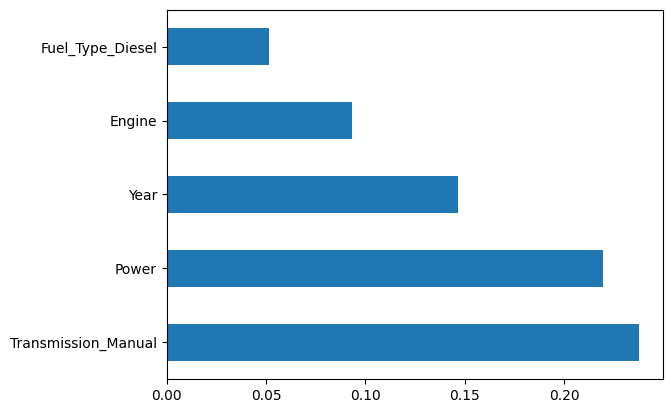

In [16]:
feature_imp = pd.Series(extra_tree_model.feature_importances_, index=X.columns)

feature_imp.nlargest(5).plot(kind='barh')
plt.show()

In [17]:
# Car prediction function that implements the model
def predict_price(car_make, car_model, year, km, fuel, transmission, engine, power, seats):
    year = dt.date.today().year - year
    carMake = np.where(X.columns=='Car_Make_'+car_make.upper())[0][0]
    carModel = np.where(X.columns=='Car_Model_'+car_model.upper())[0][0]
    fuel_index = np.where(X.columns=='Fuel_Type_'+fuel)[0][0]
    transmission_index = np.where(X.columns=='Transmission_'+transmission)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = year
    x[1] = km
    x[2] = engine
    x[3] = power
    x[4] = seats
    if carMake >= 0:
        x[carMake] = 1
    if carModel >= 0:
        x[carModel] = 1
    if fuel_index >= 0:
        x[fuel_index] = 1
    if transmission_index >= 0:
        x[transmission_index] = 1
    value =  round(car_value.predict([x])[0], 2)
    
    return f'{(value*10000*year)} KSHs.'

In [18]:
predict_price('audi', 'a4', 2011, 128059, 'Diesel', 'Manual', 50, 136, 5)

C:\Users\Nabuletion\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


'840400.0 KSHs.'